
# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Matthew Gregorius
- **Email:** matthewgregorius12@gmail.com
- **ID Dicoding:** matthewgregorius



## Menentukan Pertanyaan Bisnis

- How much users rent a bike during a specific season, in 2011 and 2012?
- How much users rent a bike during a specific weather in 2011 and 2012?
- Is there any anomaly or outliers data during a specific weather in 2011 and 2012?
- How much users rent a bike on each hour of the day during 2011 and 2012?

- How much users on one day will rent a bike in upcoming years during specific weather conditions?
- How much users will rent on each hour of a day a bike in upcoming years during specific weather conditions?

## Import all packages/library that is being used

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures


## Data Wrangling

### Gathering Data

In [3]:
day_data = pd.read_csv("day.csv")
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


- We got the total count of users on each day from 2011 until 2012
- Different season and different weather situation will effect the number of total user

In [4]:
hourly_data = pd.read_csv("hour.csv") 
hourly_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


- We got total count of users renting a bike on a specific hours each day from 2011 until 2012
- Every hour on each day have different total people renting a bike

### Assessing Data

#### Menilai tabel `day_data`

In [5]:
day_data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
print("Jumlah duplikasi: ", day_data.duplicated().sum())

Jumlah duplikasi:  0


- From this two line of code we know that there is no data that is duplicated for day_data, therefore we don't need to do data cleaning

#### Menilai tabel `hourly_data`

In [122]:
hourly_data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [123]:
print("Jumlah duplikasi: ", hourly_data.duplicated().sum())

Jumlah duplikasi:  0


- From this two line of code we also know that there is no data that is duplicated for hourly_data, therefore we don't need to do data cleaning

## Exploratory Data Analysis (EDA)

#### Explore tabel `day_data`

In [118]:
day_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


- We got the mean, first quartile, and third quartile of the data 
- The first and third quartile data will be used to determine is there any outlier for a specific condition

In [9]:
day_data.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
321,322,2011-11-18,4,0,11,0,5,1,1,0.274167,0.272721,0.410000,0.168533,245,3147,3392
15,16,2011-01-16,1,0,1,0,0,0,1,0.231667,0.234217,0.483750,0.188433,251,953,1204
629,630,2012-09-21,3,1,9,0,5,1,1,0.599167,0.571971,0.668750,0.154229,1250,6917,8167
489,490,2012-05-04,2,1,5,0,5,1,1,0.627500,0.590917,0.735417,0.162938,1069,5227,6296
635,636,2012-09-27,4,1,9,0,4,1,2,0.650000,0.607975,0.690833,0.134342,751,6642,7393


- We got 5 random data from day_data

#### Explore tabel `hourly_data`

In [124]:
hourly_data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


- We got the mean, first quartile, and third quartile of the data 
- The first and third quartile data will be used to determine is there any outlier for a specific condition

In [125]:
hourly_data.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
4944,4945,2011-07-29,3,0,7,22,0,5,1,1,0.80,0.7424,0.49,0.2239,47,127,174
4758,4759,2011-07-22,3,0,7,4,0,5,1,1,0.76,0.7424,0.75,0.1045,8,5,13
10085,10086,2012-03-01,1,1,3,7,0,4,1,2,0.44,0.4394,0.94,0.1343,8,296,304
6273,6274,2011-09-23,4,0,9,23,0,5,1,2,0.58,0.5455,1.00,0.1343,41,107,148
17033,17034,2012-12-17,4,1,12,12,0,1,1,2,0.40,0.4091,0.87,0.0000,21,211,232


- We got 5 random data from day_data

## Visualization & Explanatory Analysis

In [10]:
filtered_day_data = day_data[day_data['yr'] == 1]
filtered_hourly_data = hourly_data[hourly_data['yr'] == 1]

- Filtering data to take data only from 2012 (as an example)

#### How much bike being rented on 2011 and/or 2012 based of the season

C:\Users\LEGION\AppData\Local\Temp\ipykernel_43784\1009587880.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_data, x="season", y="cnt", palette="viridis")


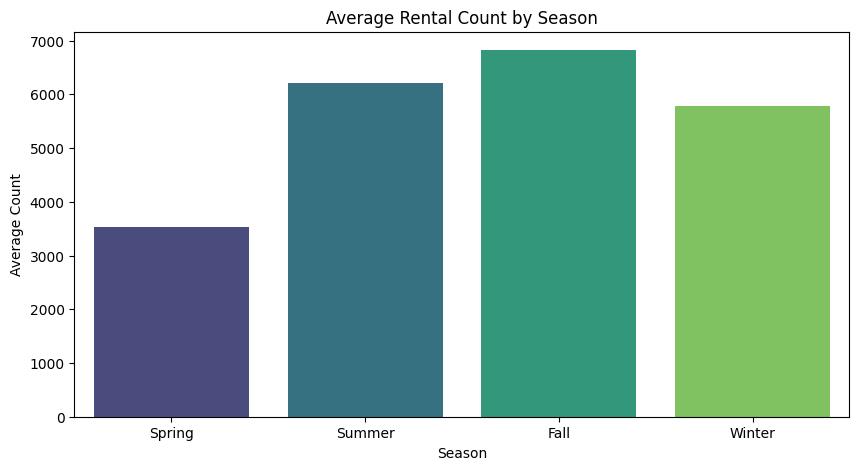

In [12]:
# Analysis 1: Rental Count Analysis
# Adjust Temperature and Humidity Ranges
temp_min, temp_max = float(filtered_day_data['temp'].min()), float(filtered_day_data['temp'].max())
hum_min, hum_max = float(filtered_day_data['hum'].min()), float(filtered_day_data['hum'].max())

# Define ranges for analysis
temp_range = (temp_min, temp_max)
humidity_range = (hum_min, hum_max)

# Filter data based on temperature and humidity ranges
filtered_data = filtered_day_data[
    (filtered_day_data['temp'] >= temp_range[0]) & 
    (filtered_day_data['temp'] <= temp_range[1]) & 
    (filtered_day_data['hum'] >= humidity_range[0]) & 
    (filtered_day_data['hum'] <= humidity_range[1])
]

# Rental Count Analysis by Season
plt.figure(figsize=(10, 5))
season_data = filtered_data.groupby("season")["cnt"].mean().reset_index()
season_data["season"] = season_data["season"].map({1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"})
sns.barplot(data=season_data, x="season", y="cnt", palette="viridis")
plt.title("Average Rental Count by Season")
plt.xlabel("Season")
plt.ylabel("Average Count")
plt.show()




- We got data of average bike rented on each day on different season
- From the graph we conclude that most people will rent a bike during fall season and will less likely to rent a bike during spring

#### How much bike being rented on 2011 and/or 2012 based of the weather

C:\Users\LEGION\AppData\Local\Temp\ipykernel_43784\687449808.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=weather_data, x="weathersit", y="cnt", palette="coolwarm")


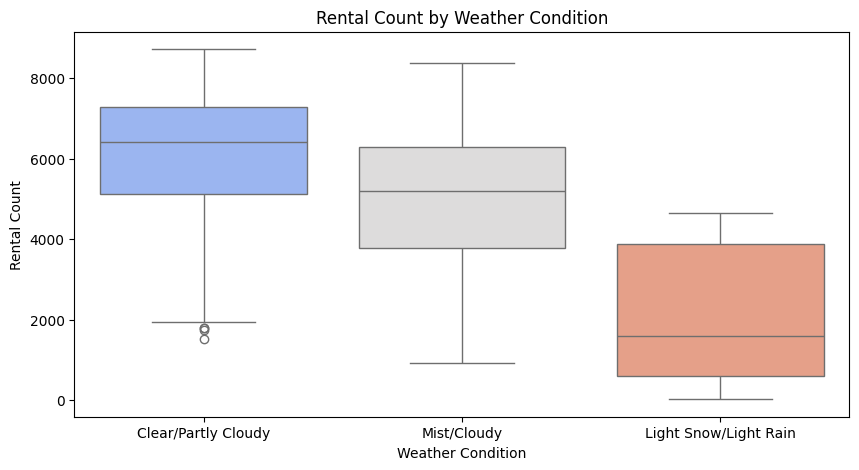

In [13]:
# Rental Count Analysis by Weather Conditions
plt.figure(figsize=(10, 5))
weather_data = filtered_data.copy()
weather_data["weathersit"] = weather_data["weathersit"].map({1: "Clear/Partly Cloudy", 2: "Mist/Cloudy", 3: "Light Snow/Light Rain", 4: "Heavy Rain/Heavy Snow"})
sns.boxplot(data=weather_data, x="weathersit", y="cnt", palette="coolwarm")
plt.title("Rental Count by Weather Condition")
plt.xlabel("Weather Condition")
plt.ylabel("Rental Count")
plt.show()


- We got the range of number of people that rent a bike during a specific weather condition
- For day that have number of users outside the upper and lower bound, it is considered as an outlier

##### Is there any outlier data on any specific date?

In [16]:
# Outlier Detection for Rental Count by Weather Conditions
outliers = []
for condition in weather_data["weathersit"].unique():
    condition_data = weather_data[weather_data["weathersit"] == condition]
    Q1 = condition_data["cnt"].quantile(0.25)
    Q3 = condition_data["cnt"].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers for the current weather condition
    condition_outliers = condition_data[(condition_data["cnt"] < lower_bound) | (condition_data["cnt"] > upper_bound)]
    outliers.append(condition_outliers)

# Concatenate outliers into a single dataframe
outlier_data = pd.concat(outliers)

# Display the outlier data and event information
if not outlier_data.empty:
    print("Detected Outliers in Rental Count by Weather Conditions:")
    display(outlier_data[["dteday", "weathersit", "cnt"]])
else:
    print("No outliers detected for the selected conditions.")


Detected Outliers in Rental Count by Weather Conditions:


,dteday,weathersit,cnt
407,2012-02-12,Clear/Partly Cloudy,1529
721,2012-12-22,Clear/Partly Cloudy,1749
722,2012-12-23,Clear/Partly Cloudy,1787
729,2012-12-30,Clear/Partly Cloudy,1796


- On 2012, there are 4 outlier data during clear/partly cloudy weather
- We got the date of the outlier data that can be further analize by searching the date + washington dc on a search engine to get an information about any event or disaster occured during that date

#### How much bike being rented based on time of the day

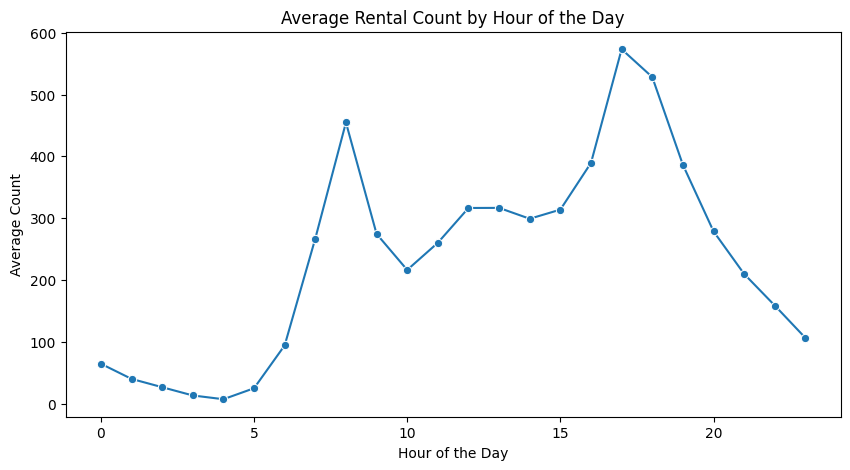

In [16]:
# Rental Count by Hour
plt.figure(figsize=(10, 5))
hourly_avg = filtered_hourly_data.groupby("hr")["cnt"].mean().reset_index()
sns.lineplot(data=hourly_avg, x="hr", y="cnt", marker='o')
plt.title("Average Rental Count by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Count")
plt.show()


- From the graph we can get the distribution of users during each hour of the day
- People will more likely to rent a bike during hour 15 to 20 and less likely to rent a bike during hour 0 to 5

## Rental Prediction Analysis

#### Daily rental prediction based on weather condition

Input weather parameter for daily-based rental prediction

In [23]:
# Define input_values with some predefined values for each feature
input_values = []

# Assuming selected_features is already defined and contains the relevant feature names
for feature in selected_feature_daily:
    if feature == "temp":
        # Set default normalized temperature (Example: 0.5 is middle of normalized range)
        temp_input = 0.5
        input_values.append(temp_input)
    elif feature == "atemp":
        # Set default normalized apparent temperature (Example: 0.5)
        atemp_input = 0.5
        input_values.append(atemp_input)
    elif feature == "hum":
        # Set default normalized humidity (Example: 0.5)
        humidity_input = 0.5
        input_values.append(humidity_input)
    elif feature == "windspeed":
        # Set default normalized windspeed (Example: 0.1)
        windspeed_input = 0.1
        input_values.append(windspeed_input)
    elif feature == "season":
        # Set default season (Example: 1 for Spring)
        season_input = 1  # Mapping: 1 = Spring, 2 = Summer, 3 = Fall, 4 = Winter
        input_values.append(season_input)
    elif feature == "weathersit":
        # Set default weather situation (Example: 1 for Clear)
        weather_input = 1  # Mapping: 1 = Clear, 2 = Mist, 3 = Light Snow/Rain, 4 = Heavy Rain/Snow
        input_values.append(weather_input)
    elif feature == "holiday":
        # Set default holiday status (Example: 0 for No)
        holiday_input = 0  # Mapping: 0 = No, 1 = Yes
        input_values.append(holiday_input)
    elif feature == "workingday":
        # Set default working day status (Example: 1 for Working Day)
        workingday_input = 1  # Mapping: 0 = Holiday, 1 = Working Day
        input_values.append(workingday_input)

- Defining variabel input as the parameter to determine how much people in one day will rent a bike during a specific weather condition

Daily-based rental prediction result

Mean Squared Error: 1903204.73
R-squared: 0.46


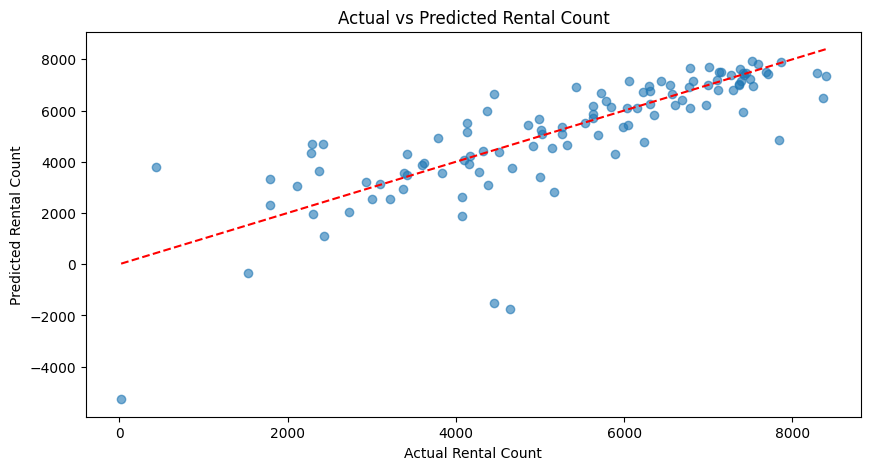

Predicted Daily Rental Count:5672


c:\Users\LEGION\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Feature selection for daily prediction
data = filtered_day_data
selected_feature_daily = ["temp", "hum", "windspeed", "season", "weathersit", "holiday", "workingday"]

# Define X and y for the model (use filtered data for prediction)
X = data[selected_feature_daily]
y = data["cnt"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Polynomial Transformation
poly = PolynomialFeatures(degree=3)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Train the Linear Regression Model
reg_model = LinearRegression()
reg_model.fit(X_poly_train, y_train)

# Make Predictions on Test Data
y_pred_test = reg_model.predict(X_poly_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

# Display results
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Visualize actual vs predicted values
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_test, alpha=0.6)
plt.xlabel("Actual Rental Count")
plt.ylabel("Predicted Rental Count")
plt.title("Actual vs Predicted Rental Count")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line for reference
plt.show()

input_data = [input_values]  # Convert to 2D array
input_data_poly = poly.transform(input_data)  # Transform to polynomial features
            # Predict rental count
predicted_count = reg_model.predict(input_data_poly)[0]

            # Set negative prediction to zero and round up if necessary
predicted_count = max(predicted_count, 0)  # Replace negative value with 0
predicted_count = np.ceil(predicted_count)  # Round up the value

print(f"Predicted Daily Rental Count:{predicted_count:.0f}")

- On the paramater (weather) that has been set, we got a linear regression that we can extrapolate to predict number of people that will rent a bike during that parameter
- In this example we predict a total of 5672 people will rent a bike during that parameter

#### Hourly rental prediction based on weather condition

Input weather parameter for hour-based rental prediction

In [28]:
# Define input_values with some predefined values for each feature
input_values = []

# Assuming selected_features is already defined and contains the relevant feature names
for feature in selected_features_hourly:
    if feature == "hr":
        # Set default hour for predictions (e.g., Noon)
        hr_input = 17  # Example: hour 17
        input_values.append(hr_input)
    elif feature == "temp":
        # Set default normalized temperature (Example: 0.5 is middle of normalized range)
        temp_input = 0.5
        input_values.append(temp_input)
    elif feature == "atemp":
        # Set default normalized apparent temperature (Example: 0.5)
        atemp_input = 0.5
        input_values.append(atemp_input)
    elif feature == "hum":
        # Set default normalized humidity (Example: 0.5)
        humidity_input = 0.5
        input_values.append(humidity_input)
    elif feature == "windspeed":
        # Set default normalized windspeed (Example: 0.1)
        windspeed_input = 0.1
        input_values.append(windspeed_input)
    elif feature == "season":
        # Set default season (Example: 1 for Spring)
        season_input = 1  # Mapping: 1 = Spring, 2 = Summer, 3 = Fall, 4 = Winter
        input_values.append(season_input)
    elif feature == "weathersit":
        # Set default weather situation (Example: 1 for Clear)
        weather_input = 1  # Mapping: 1 = Clear, 2 = Mist, 3 = Light Snow/Rain, 4 = Heavy Rain/Snow
        input_values.append(weather_input)
    elif feature == "holiday":
        # Set default holiday status (Example: 0 for No)
        holiday_input = 0  # Mapping: 0 = No, 1 = Yes
        input_values.append(holiday_input)
    elif feature == "workingday":
        # Set default working day status (Example: 1 for Working Day)
        workingday_input = 1  # Mapping: 0 = Holiday, 1 = Working Day
        input_values.append(workingday_input)

# Now the input_values list contains the necessary inputs for the hourly prediction


- Defining variabel input as the parameter to determine how much people on a specific hour of a day in a specific weather condition

Hour-based rental prediction result

### Hourly Predictions


,Hour,Predicted Rental
0,17,387.0


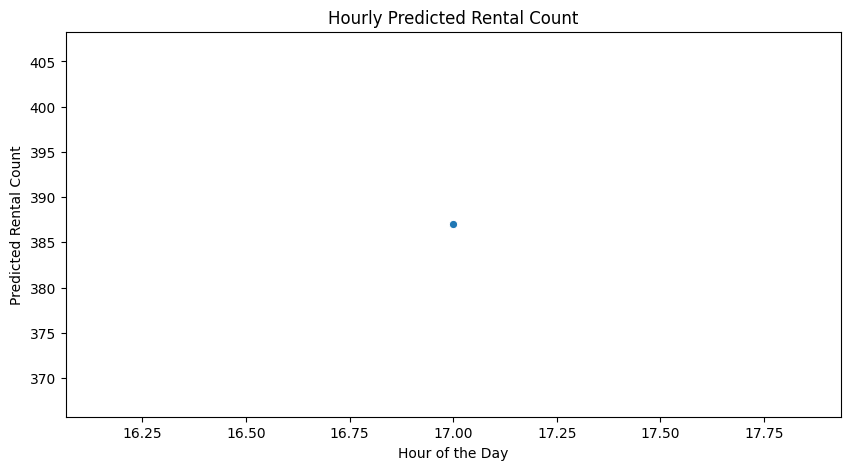

In [30]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Feature selection for daily prediction
data = filtered_hourly_data
selected_features_hourly = ["hr", "temp", "hum", "windspeed", "season", "weathersit", "holiday", "workingday"]

# Define X and y for the model (use filtered data for prediction)
X = data[selected_features_hourly]
y = data["cnt"]
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Hourly Predictions for Rental Count using the trained model
# Polynomial Transformation
poly = PolynomialFeatures(degree=3)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Train the Linear Regression Model
reg_model = LinearRegression()
reg_model.fit(X_poly_train, y_train)

# Make Predictions on Test Data
y_pred_test = reg_model.predict(X_poly_test)

# Create sample data with input values for each hour of the day
hours = (hr_input)
input_samples = pd.DataFrame([input_values] * 1, columns=selected_features_hourly)

# Polynomial transformation of the input samples
input_samples_poly = poly.transform(input_samples)

# Predict rental count for each hour
predicted_counts = reg_model.predict(input_samples_poly)

# Set negative predictions to zero and round up all predictions
predicted_counts = np.maximum(predicted_counts, 0)  # Replace negative values with 0
predicted_counts = np.ceil(predicted_counts)  # Round up all predictions

# Display hourly predictions in a table format
hourly_prediction_df = pd.DataFrame({"Hour": hours, "Predicted Rental": predicted_counts})
print("### Hourly Predictions")
display(hourly_prediction_df)

# Show line plot for hourly predicted rental count
plt.figure(figsize=(10, 5))
sns.lineplot(data=hourly_prediction_df, x="Hour", y="Predicted Rental", marker='o')
plt.title("Hourly Predicted Rental Count")
plt.xlabel("Hour of the Day")
plt.ylabel("Predicted Rental Count")
plt.show()


- We use a 3rd degree polynomial that seems to have the best fit based on data that is known
- Based of the example paramater that is being set, it predict that there will be 387 people rent a bike on hour 17.00 during the set parameter (weather)

## Conclusion

- In 2012, Fall season have the most people renting a bike with average users around 6000 people followed by summer and winter with average users of around 5000 people and then followed by spring season with the lowest average of around 2500 people

- In 2012, most people rent a bike during clear/partly cloudy with average of around 6000 people followed by mist/cloudy weather with average of around 5750 people and followed by light snow/light rain weather with the least average user of under 2000 users

- There is an outlier in 2012 during clear/partly cloudy weather with 4 days of anomaly on 12th of February, 22nd December, 23rd December and 30th December

- People will most likely to rent a bike during the hour 17 of the day with a total of just under 600 people rent a bike in 2012, while people will lest likely to rent a bike during hour 0 to 5 of the day

- It is predicted to be a total of 5672 people rent a bike during the example parameter that is being set on one day

- It is predicet to be a total of 387 people rent a bike during the hour 17 of the day with the example parameter that is being set

